# Binary Classification Project
## Predicting Class (0 or 1) using Multiple Machine Learning Models

**Objective**: Train classifiers to predict binary class labels using F1 score as the evaluation metric.

**Models**:
- Logistic Regression
- Random Forest
- Gradient Boosting

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    f1_score, 
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Data

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (260, 39)

First 5 rows:


,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
0,1,0,1,0,2,4,3,4,4,2,...,4,4,4,4,4.0,4.0,4.0,1.0,3.20,1
1,2,0,0,0,2,4,4,4,4,3,...,4,3,4,4,3.0,4.0,3.0,0.0,3.82,1
2,3,0,1,0,1,3,2,3,4,3,...,3,4,4,3,4.0,4.0,2.0,1.0,3.75,1
3,4,1,1,1,3,4,4,4,4,4,...,4,4,4,4,3.0,4.0,4.0,1.0,3.70,1
4,5,0,0,0,2,4,3,3,4,3,...,4,3,3,3,4.0,4.0,2.0,1.0,3.82,0


In [3]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           260 non-null    int64  
 1   Gender       260 non-null    int64  
 2   Nationality  260 non-null    int64  
 3   Major        260 non-null    int64  
 4   Level        260 non-null    int64  
 5   IE1          260 non-null    int64  
 6   SMSK3        260 non-null    int64  
 7   RAS1         260 non-null    int64  
 8   RAS2         260 non-null    int64  
 9   SMSK1        260 non-null    int64  
 10  SMSK4        260 non-null    int64  
 11  IE2          260 non-null    int64  
 12  TL1          260 non-null    int64  
 13  RAS3         260 non-null    int64  
 14  IE3          260 non-null    int64  
 15  RAS4         260 non-null    int64  
 16  RAS5         260 non-null    int64  
 17  IE4          260 non-null    int64  
 18  SMSK2        260 non-null    int64  
 19  TL2     

In [4]:
# Statistical summary
df.describe()

,ID,Gender,Nationality,Major,Level,IE1,SMSK3,RAS1,RAS2,SMSK1,...,IM3,IM4,IM5,IM6,W1,W2,W3,Employed,Score,Class
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,241.000000,246.000000,210.000000,258.000000,260.000000,260.000000
mean,130.500000,0.400000,0.303846,0.453846,1.973077,3.523077,3.226923,3.476923,3.542308,3.073077,...,3.557692,3.426923,3.376923,3.265385,3.344398,3.394309,2.566667,0.848837,3.510577,0.488462
std,75.199734,0.490843,0.460804,0.498825,0.442926,0.592298,0.744637,0.654245,0.629195,0.851099,...,0.652097,0.728916,0.768747,0.807036,0.852484,0.794758,1.144085,0.358904,0.452017,0.500831
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,65.750000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.430000,0.000000
50%,130.500000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.510000,0.000000
75%,195.250000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,3.710000,1.000000
max,260.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000


In [5]:
# Check for missing values
print("Missing Values per Column:")
missing = df.isnull().sum()
missing[missing > 0]

Missing Values per Column:


W1          19
W2          14
W3          50
Employed     2
dtype: int64

In [6]:
# Check class distribution
print("Class Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%)")
print(df['Class'].value_counts(normalize=True) * 100)

Class Distribution:
Class
0    133
1    127
Name: count, dtype: int64

Class Distribution (%)
Class
0    51.153846
1    48.846154
Name: proportion, dtype: float64


## 3. Data Visualization

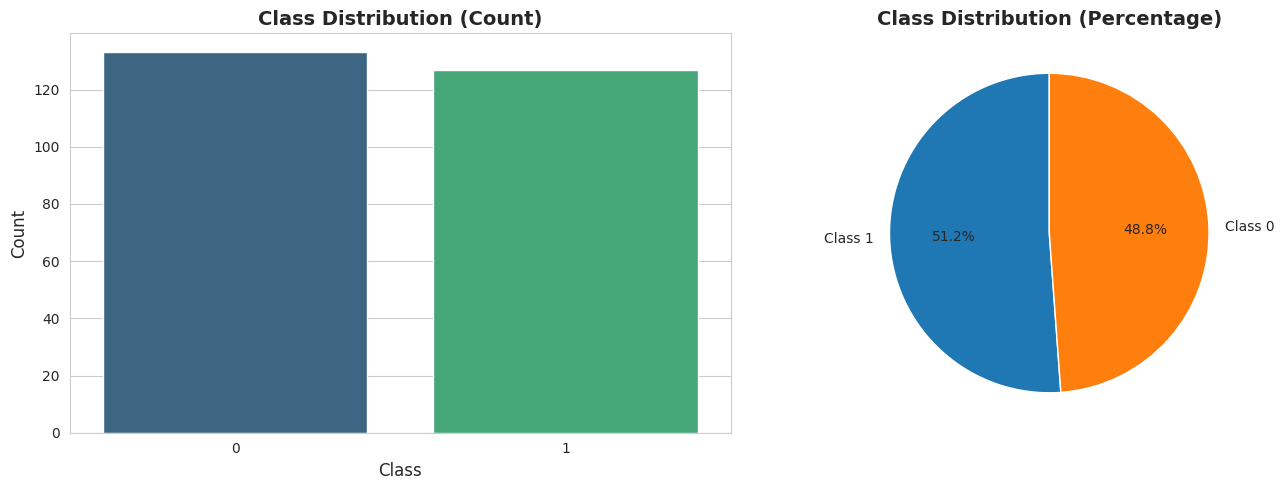

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Class', ax=axes[0], palette='viridis')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

class_counts = df['Class'].value_counts()
axes[1].pie(class_counts, labels=['Class 1', 'Class 0'], autopct='%1.1f%%', 
            startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

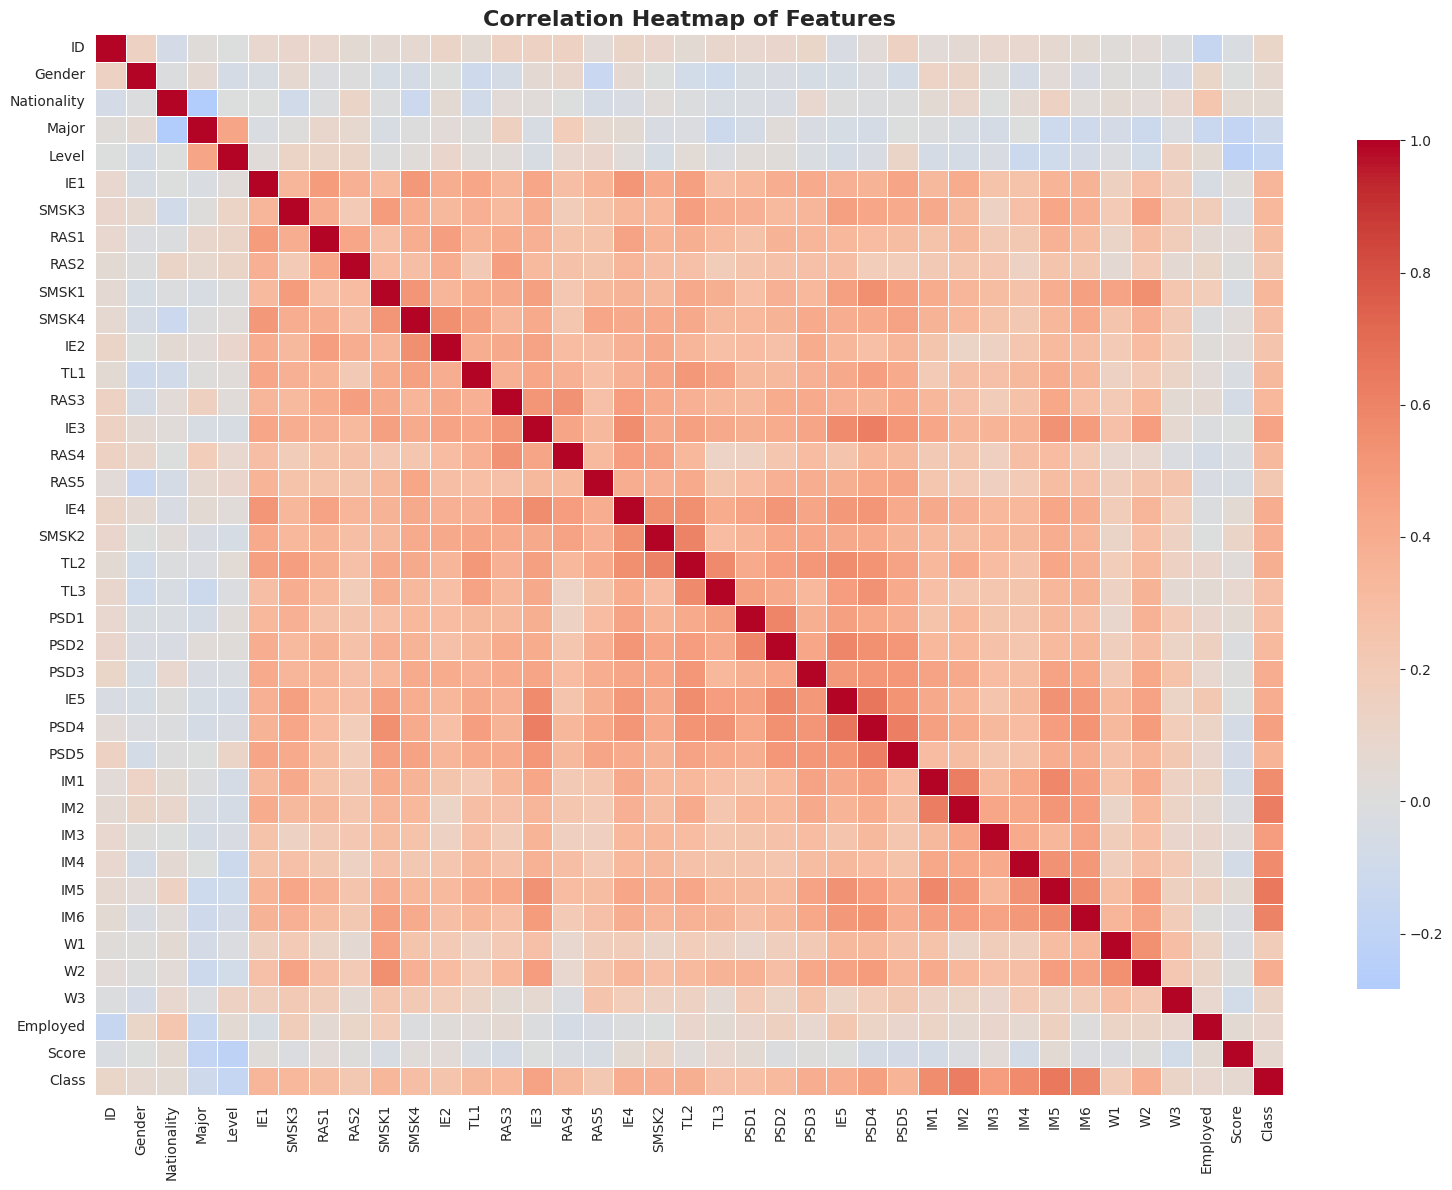

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [9]:
# Separate features and target
X = df.drop(['Class', 'ID'], axis=1)  # Drop ID as it's not a feature
y = df['Class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (260, 37)
Target shape: (260,)

Feature columns:
['Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1', 'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5', 'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4', 'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3', 'Employed', 'Score']


In [10]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Missing values after imputation:")
print(X_imputed.isnull().sum().sum())

Missing values after imputation:
0


In [11]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: (208, 37)
Testing set size: (52, 37)

Training set class distribution:
Class
0    106
1    102
Name: count, dtype: int64

Testing set class distribution:
Class
0    27
1    25
Name: count, dtype: int64


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Data preprocessing completed!")

✓ Data preprocessing completed!


## 5. Model Training and Evaluation

We will train three different classifiers:
1. **Logistic Regression** - Linear model, good baseline
2. **Random Forest** - Ensemble method, handles non-linearity well
3. **Gradient Boosting** - Sequential ensemble, often achieves high performance

### 5.1 Logistic Regression

In [13]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_f1 = f1_score(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print("LOGISTIC REGRESSION RESULTS :")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"ROC AUC: {lr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

LOGISTIC REGRESSION RESULTS :
F1 Score: 0.8800
Accuracy: 0.8846
Precision: 0.8800
Recall: 0.8800
ROC AUC: 0.9793

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.88      0.88      0.88        25

    accuracy                           0.88        52
   macro avg       0.88      0.88      0.88        52
weighted avg       0.88      0.88      0.88        52



### 5.2 Random Forest Classifier

In [14]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_f1 = f1_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)


print("RANDOM FOREST RESULTS :")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

RANDOM FOREST RESULTS :
F1 Score: 0.8980
Accuracy: 0.9038
Precision: 0.9167
Recall: 0.8800
ROC AUC: 0.9822

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.92      0.88      0.90        25

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



### 5.3 Gradient Boosting Classifier

In [15]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
gb_f1 = f1_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_pred_proba)

print("=" * 50)
print("GRADIENT BOOSTING RESULTS")
print("=" * 50)
print(f"F1 Score: {gb_f1:.4f}")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"ROC AUC: {gb_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

GRADIENT BOOSTING RESULTS
F1 Score: 0.9615
Accuracy: 0.9615
Precision: 0.9259
Recall: 1.0000
ROC AUC: 0.9970

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.93      1.00      0.96        25

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



## 6. Model Comparison

In [17]:
# Create comparison DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'F1 Score': [lr_f1, rf_f1, gb_f1],
    'Accuracy': [lr_accuracy, rf_accuracy, gb_accuracy],
    'Precision': [lr_precision, rf_precision, gb_precision],
    'Recall': [lr_recall, rf_recall, gb_recall],
    'ROC AUC': [lr_auc, rf_auc, gb_auc]
})

print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
print(results.to_string(index=False))
print("=" * 80)

best_model_idx = results['F1 Score'].idxmax()
print(f"\n Best Model (by F1 Score): {results.loc[best_model_idx, 'Model']}")
print(f"   F1 Score: {results.loc[best_model_idx, 'F1 Score']:.4f}")


MODEL COMPARISON SUMMARY
              Model  F1 Score  Accuracy  Precision  Recall  ROC AUC
Logistic Regression  0.880000  0.884615   0.880000    0.88 0.979259
      Random Forest  0.897959  0.903846   0.916667    0.88 0.982222
  Gradient Boosting  0.961538  0.961538   0.925926    1.00 0.997037

 Best Model (by F1 Score): Gradient Boosting
   F1 Score: 0.9615


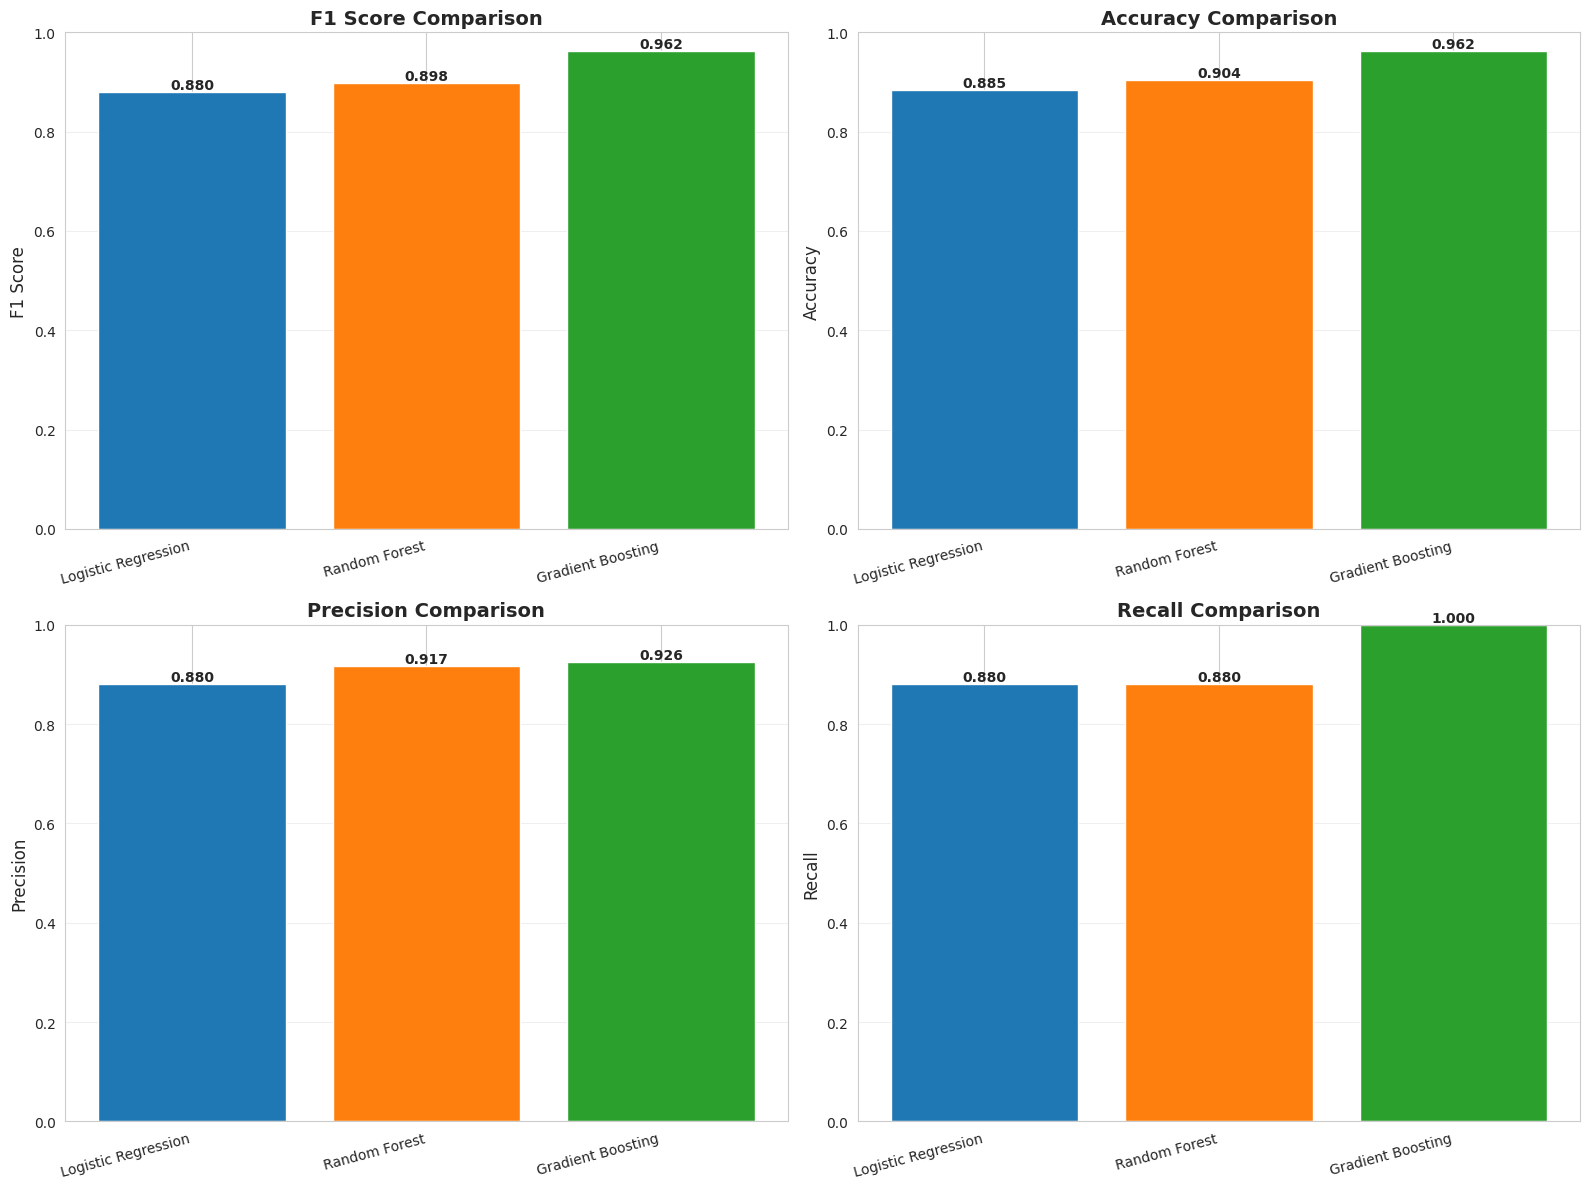

In [18]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(results['Model'], results[metric], color=colors)
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_xticklabels(results['Model'], rotation=15, ha='right')

plt.tight_layout()
plt.show()

## 7. Confusion Matrices

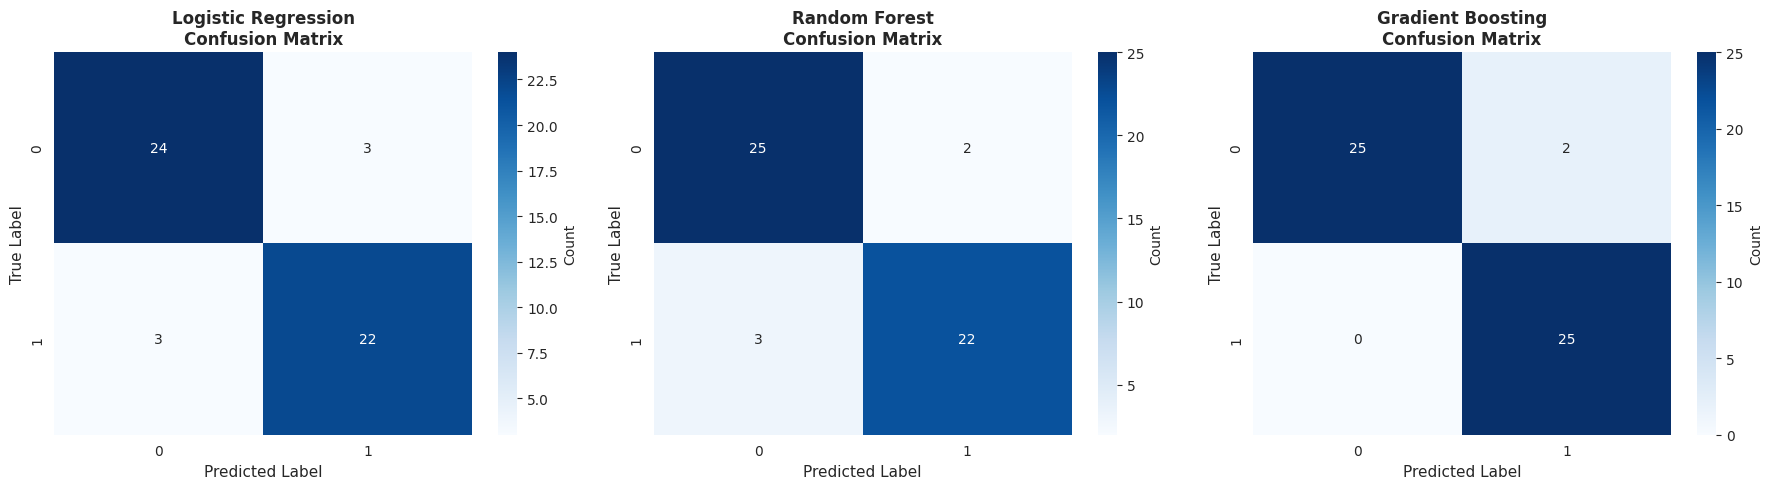

In [19]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Logistic Regression', lr_pred),
    ('Random Forest', rf_pred),
    ('Gradient Boosting', gb_pred)
]

for idx, (name, pred) in enumerate(models_data):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.show()

## 9. Feature Importance (Random Forest & Gradient Boosting)

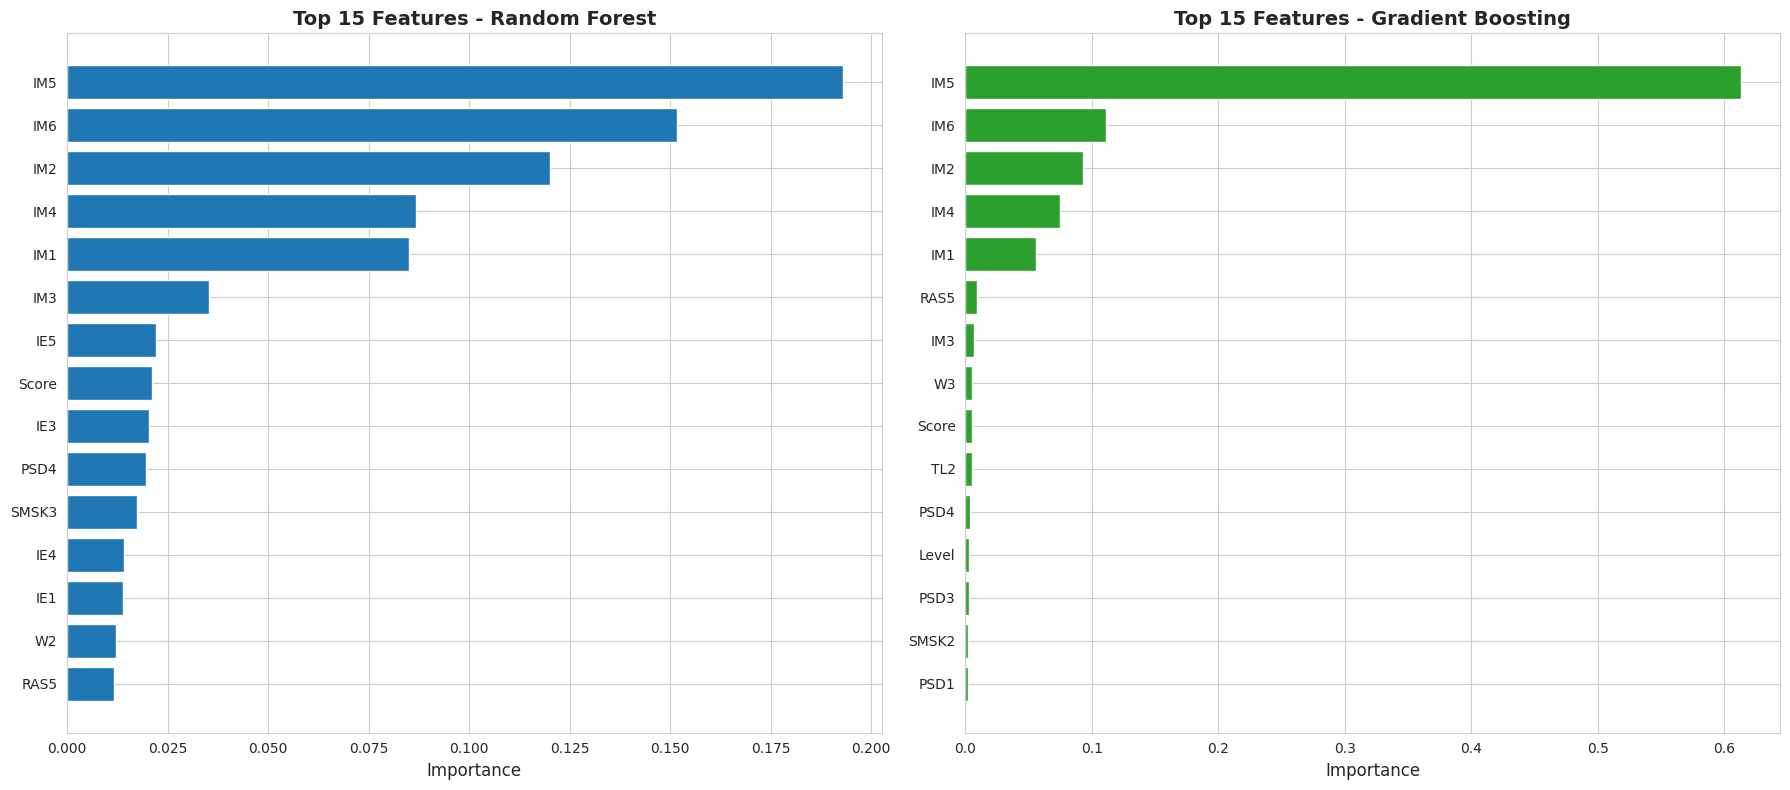

In [20]:
# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Feature importance for Gradient Boosting
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Random Forest
top_rf = rf_importance.head(15)
axes[0].barh(range(len(top_rf)), top_rf['Importance'], color='#1f77b4')
axes[0].set_yticks(range(len(top_rf)))
axes[0].set_yticklabels(top_rf['Feature'])
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Gradient Boosting
top_gb = gb_importance.head(15)
axes[1].barh(range(len(top_gb)), top_gb['Importance'], color='#2ca02c')
axes[1].set_yticks(range(len(top_gb)))
axes[1].set_yticklabels(top_gb['Feature'])
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Top 15 Features - Gradient Boosting', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 11. Final Summary

In [21]:
print("\n" + "=" * 80)
print("FINAL SUMMARY")
print("=" * 80)
print(f"\nDataset: {df.shape[0]} samples, {df.shape[1]-1} features")
print(f"Target Variable: Class (0 or 1)")
print(f"Train/Test Split: 80/20 ({len(X_train)} train, {len(X_test)} test)")
print(f"\nEvaluation Metric: F1 Score")
print(f"\nModels Trained:")
print(f"  1. Logistic Regression")
print(f"  2. Random Forest (100 trees)")
print(f"  3. Gradient Boosting (100 estimators)")
print(f"\nBest Model: {results.loc[best_model_idx, 'Model']}")
print(f"Best F1 Score: {results.loc[best_model_idx, 'F1 Score']:.4f}")
print("\n" + "=" * 80)
print("Project completed successfully! ✓")
print("=" * 80)


FINAL SUMMARY

Dataset: 260 samples, 38 features
Target Variable: Class (0 or 1)
Train/Test Split: 80/20 (208 train, 52 test)

Evaluation Metric: F1 Score

Models Trained:
  1. Logistic Regression
  2. Random Forest (100 trees)
  3. Gradient Boosting (100 estimators)

Best Model: Gradient Boosting
Best F1 Score: 0.9615

Project completed successfully! ✓
